In [1]:
import json
import os
import glob
import pandas as pd 
import numpy as np
import xlwings as xw
import matplotlib.pyplot as plt

In [2]:
# import the json file in a certain directory
path="Z:\QBERE_BRU\Research\Private\TDisk_RD\People\Harrison\Json exploration\SAS to json"
r = []

for root, dirs,files in os.walk(path):
    for name in files:
        filepath = root + os.sep + name
        if filepath.endswith(".json"):
            r.append(os.path.join(root, name))
                

json_list=[]

for file in r:
    json_file=open(file, "r")
    json_list.append(json.load(json_file))
    

#Get the quotation number

quot_nr=[]

for dico in json_list:
    b=1
    for key in dico['OriginalPriorities']:
        if b==1: 
            a="_".join((str(dico['OriginalPriorities'][key][0]['CREAT_Y']),str(dico['OriginalPriorities'][key][0]['Quot_NR'])))
            b+=1
        else:
            a="_".join((a,str(dico['OriginalPriorities'][key][0]['CREAT_Y']),str(dico['OriginalPriorities'][key][0]['Quot_NR'])))
    quot_nr.append(a)
    
    
print(quot_nr)

['2017_529', '2016_538', '2015_62_2015_606_2015_607', '2016_256', '2009_197', '2005_37', '2018_393', '2017_499', '2012_132', '2013_292', '2002_234_2007_94_2007_160', '2020_315_2018_384']


In [3]:
#Define Daraframe that contains the IBNER coefficients
data_info=pd.DataFrame(columns=('FAY','LAY','LDY'),index=quot_nr)
i=0
for dico in json_list:
    data_info.loc[:,'FAY'][i]=dico["DataInfo"]["FAY"]
    data_info.loc[:,'LAY'][i]=dico["DataInfo"]["LAY"]
    data_info.loc[:,'LDY'][i]=dico["DataInfo"]["LDY"]
    i=i+1

data_info['DY']=data_info['LDY']-data_info['FAY']


ibner_coeff_retained=pd.DataFrame(np.ones((data_info['DY'].max(),data_info.shape[0])),columns=quot_nr)
ibner_coeff_retained_open=pd.DataFrame(np.ones((data_info['DY'].max(),data_info.shape[0])),columns=quot_nr)

ibner_coeff_original=pd.DataFrame(np.ones((data_info['DY'].max(),data_info.shape[0])),columns=quot_nr)
ibner_coeff_original_open=pd.DataFrame(np.ones((data_info['DY'].max(),data_info.shape[0])),columns=quot_nr)


i=0
for dico in json_list:
    for key in dico['IBNER']['Retained']:
        c=key.split('_')
        ibner_coeff_retained.iloc[int(c[1]),i]=dico['IBNER']['Retained'][key]
        
    for key in dico['IBNER']['RetainedOpen']:
        c=key.split('_')
        ibner_coeff_retained_open.iloc[int(c[1]),i]=dico['IBNER']['RetainedOpen'][key]
        
        
    for key in dico['IBNER']['Original']:
        c=key.split('_')
        ibner_coeff_original.iloc[int(c[1]),i]=dico['IBNER']['Original'][key]
        
    for key in dico['IBNER']['OriginalOpen']:
        c=key.split('_')
        ibner_coeff_original_open.iloc[int(c[1]),i]=dico['IBNER']['OriginalOpen'][key]
        
    i=i+1
    

#print(ibner_coeff_retained)
   

<AxesSubplot:title={'center':'Retained Open IBNER coefficient'}>

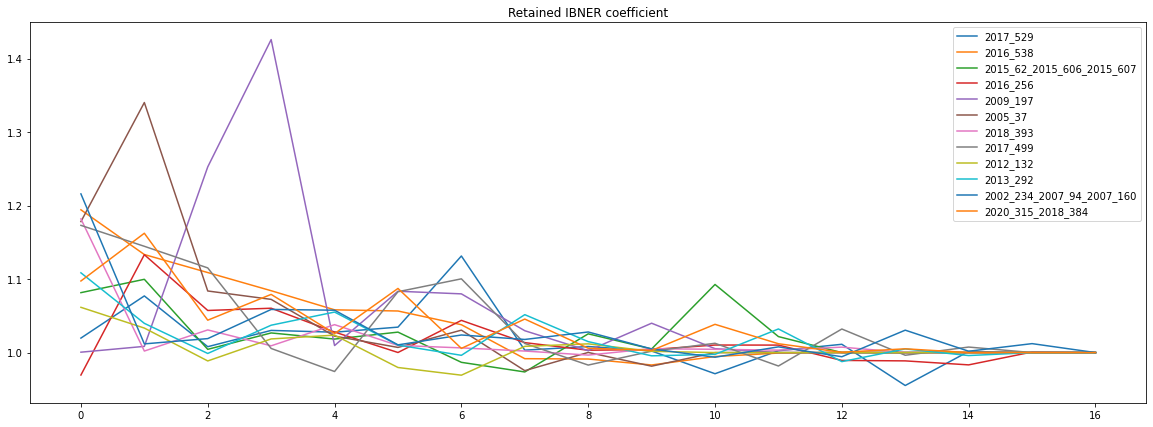

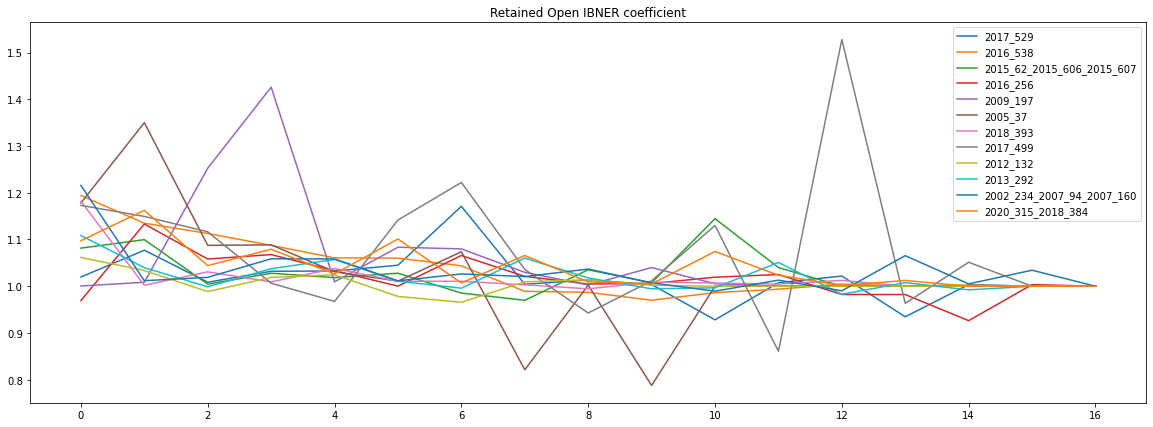

In [4]:

ibner_coeff_retained.plot(figsize=(20,7),title="Retained IBNER coefficient")

ibner_coeff_retained_open.plot(figsize=(20,7),title="Retained Open IBNER coefficient")


<AxesSubplot:title={'center':'Ratio Open IBNER coefficient'}>

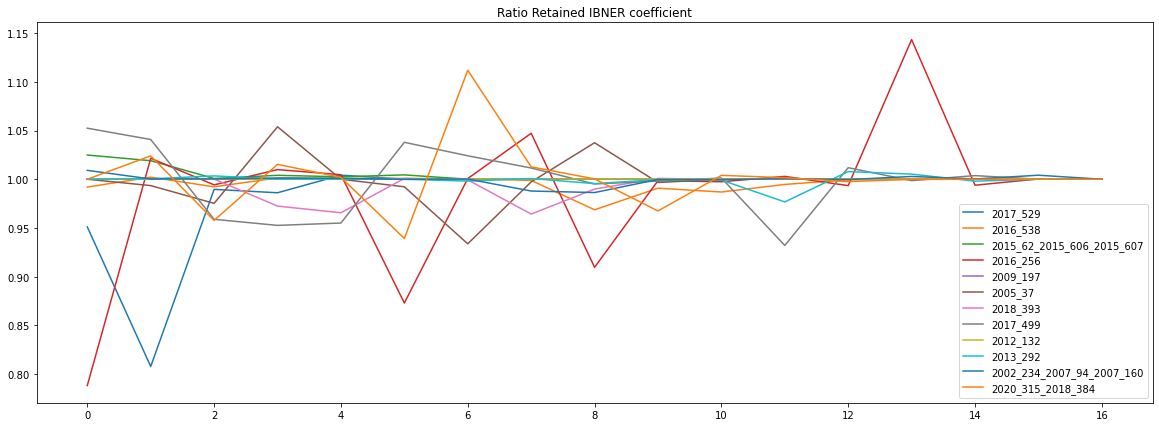

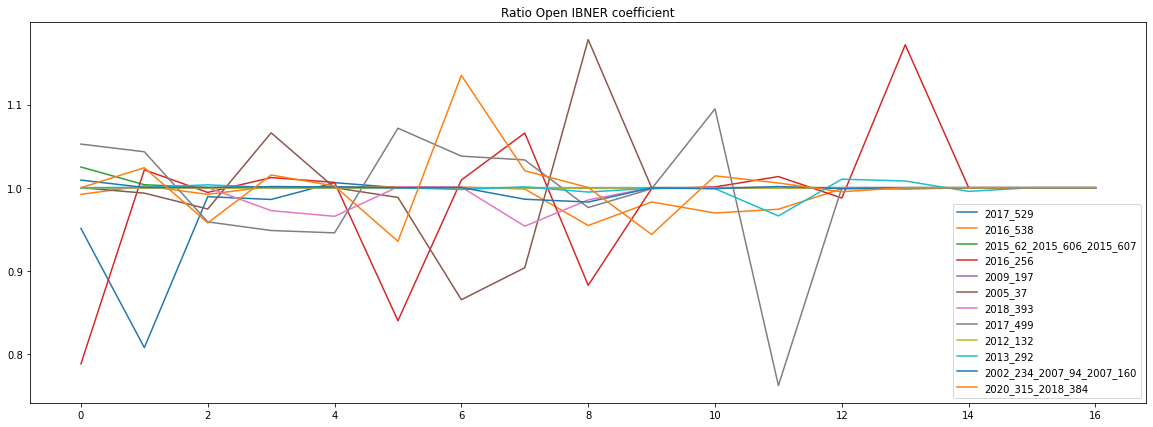

In [5]:
#Define the ration between the IBNER Retained and original
ratio_ibner_retained_original=ibner_coeff_retained/ibner_coeff_original
ratio_ibner_retained_original.plot(figsize=(20,7),title="Ratio Retained IBNER coefficient")

ratio_ibner_retained_original_open=ibner_coeff_retained_open/ibner_coeff_original_open
ratio_ibner_retained_original_open.plot(figsize=(20,7),title="Ratio Open IBNER coefficient")



In [6]:
# get the Threshold for Each quotation number
Threshold=pd.DataFrame(np.ones((data_info.shape[0],2)),index=quot_nr,columns=['RetainedThreshold','Originalthreshold'])

i=0
for dico in json_list:
  
    Threshold.iloc[i,0]=dico['AMIN']['Amin_Retained']
    Threshold.iloc[i,1]=dico['AMIN']['Amin_Calculated']
        
        
    i=i+1
    
#print(Threshold)
 


In [7]:
#IBNR Coefficient chain ladder
ibnr_coeff_retained_cl=pd.DataFrame(np.ones((data_info['DY'].max(),data_info.shape[0])),columns=quot_nr)

ibnr_coeff_original_cl=pd.DataFrame(np.ones((data_info['DY'].max(),data_info.shape[0])),columns=quot_nr)

#IBNR Coefficient Additive
ibnr_coeff_retained_additive=pd.DataFrame(np.zeros((data_info['DY'].max(),data_info.shape[0])),columns=quot_nr)

ibnr_coeff_original_additive=pd.DataFrame(np.zeros((data_info['DY'].max(),data_info.shape[0])),columns=quot_nr)


i=0
for dico in json_list:
    for key in dico['IBNR']['RetainedCL']:
        c=key.split('_')
        ibnr_coeff_retained_cl.iloc[int(c[1]),i]=dico['IBNR']['RetainedCL'][key]
        
    for key in dico['IBNR']['RetainedAdditive']:
        c=key.split('_')
        ibnr_coeff_retained_additive.iloc[int(c[1]),i]=dico['IBNR']['RetainedAdditive'][key]
        
        
    for key in dico['IBNR']['OriginalCL']:
        c=key.split('_')
        ibnr_coeff_original_cl.iloc[int(c[1]),i]=dico['IBNR']['RetainedCL'][key]
        
    for key in dico['IBNR']['OriginalAdditive']:
        c=key.split('_')
        ibnr_coeff_original_additive.iloc[int(c[1]),i]=dico['IBNR']['OriginalAdditive'][key]
        
    i=i+1
    

#print(ibnr_coeff_original_additive)

<AxesSubplot:title={'center':'Retained Payment Pattern'}>

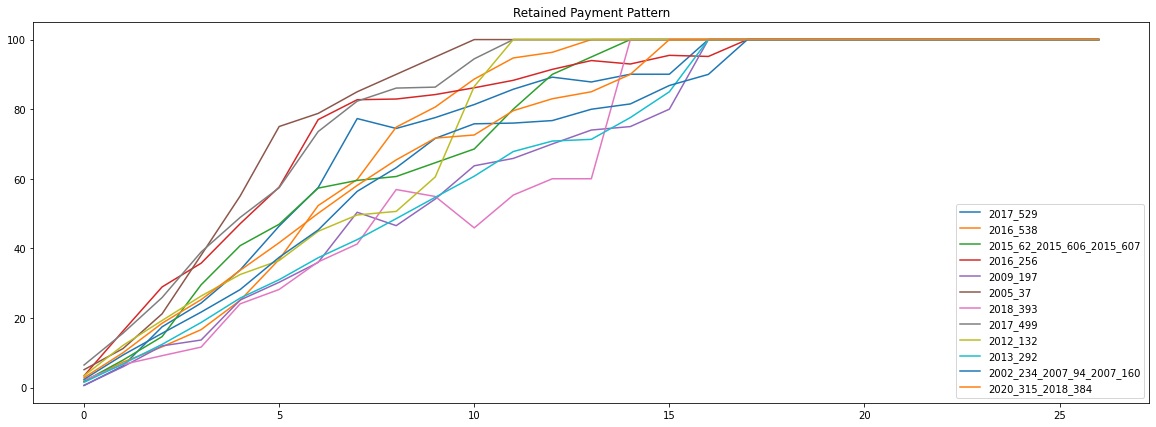

In [8]:
#Payment patterns

paymentPatternRetained=pd.DataFrame(np.ones((data_info['DY'].max()+10,data_info.shape[0]))*100,columns=quot_nr)

paymentPatternOriginal=pd.DataFrame(np.ones((data_info['DY'].max()+10,data_info.shape[0]))*100,columns=quot_nr)

#print(paymentPatternRetained)

i=0
for dico in json_list:
    
    for key in dico['PaymentPattern']['Retained']:
        c=key.split('_')
        paymentPatternRetained.iloc[int(c[1]),i]=dico['PaymentPattern']['Retained'][key]
        
    for key in dico['PaymentPattern']['Original']:
        c=key.split('_')
        paymentPatternOriginal.iloc[int(c[1]),i]=dico['PaymentPattern']['Original'][key]
        
    i=i+1

#print(paymentPatternRetained)

paymentPatternRetained.plot(figsize=(20,7),title="Retained Payment Pattern")

In [9]:
#Overstatement patterns

overstatementPatternRetained=pd.DataFrame(np.ones((data_info['DY'].max()+10,data_info.shape[0])),columns=quot_nr)

overstatementPatternOriginal=pd.DataFrame(np.ones((data_info['DY'].max()+10,data_info.shape[0])),columns=quot_nr)



i=0
for dico in json_list:
    
    for key in dico['OverstatementPattern']['Retained']:
        c=key.split('_')
        overstatementPatternRetained.iloc[int(c[1]),i]=dico['OverstatementPattern']['Retained'][key]
        
    for key in dico['OverstatementPattern']['Original']:
        c=key.split('_')
        overstatementPatternOriginal.iloc[int(c[1]),i]=dico['OverstatementPattern']['Original'][key]
        
    i=i+1

#print(overstatementPatternRetained)

In [10]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


In [11]:
widgets.SelectMultiple(
    options=quot_nr,
    #value=['Oranges'],
    #rows=10,
    description='Qt number',
    disabled=False
)

SelectMultiple(description='Qt number', options=('2017_529', '2016_538', '2015_62_2015_606_2015_607', '2016_25…

In [12]:
names = []
checkbox_objects = []
for q in quot_nr:
    checkbox_objects.append(widgets.Checkbox(value=True, description=q))
    names.append(q)

arg_dict = {names[i]: checkbox for i, checkbox in enumerate(checkbox_objects)}

ui = widgets.VBox(children=checkbox_objects)

selected_data = []
def select_data(**kwargs):
    selected_data.clear()

    for key in kwargs:
        if kwargs[key] is True:
            selected_data.append(key)

    print(selected_data)

out = widgets.interactive_output(select_data, arg_dict)
display(ui, out)

Output()

In [13]:
test_df=paymentPatternRetained[selected_data]
print(test_df)

      2017_529    2016_538  2015_62_2015_606_2015_607    2016_256    2009_197  \
0     0.584655    1.824517                   1.768245    3.377684    0.658769   
1     6.241266    7.320824                   7.894793   16.262966    5.977059   
2    17.446943   11.707996                  14.628941   28.910480   11.972137   
3    24.271544   16.635886                  29.521649   35.728283   13.652307   
4    33.783218   25.056896                  40.769061   47.075275   25.148869   
5    46.408566   36.812946                  46.929047   57.607086   30.250871   
6    57.469749   52.291917                  57.309877   76.997382   35.964505   
7    77.299391   59.784870                  59.528720   82.715608   50.374188   
8    74.456649   74.842103                  60.648914   82.914542   46.526189   
9    77.579080   80.618010                  64.602846   84.195339   54.173676   
10   81.327819   88.643914                  68.560040   86.148607   63.731041   
11   85.726217   94.719741  

In [14]:
#pip install nbinteract